<a href="https://colab.research.google.com/github/fjpcediel87/DeepLearning--Learning/blob/main/Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.77MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.85MB/s]


In [ ]:
len(dataset)

60000

image.shape: torch.Size([1, 28, 28])
Label: 5


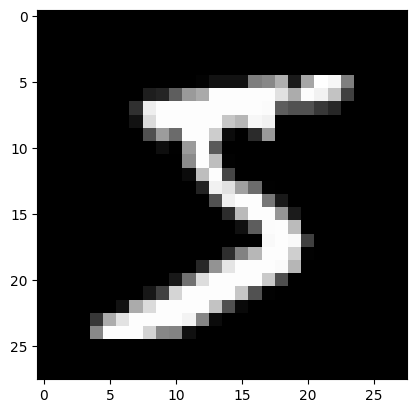

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1,2,0), cmap='gray')
print('Label:', label)

In [ ]:
from torch.utils.data import random_split
val_size =10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


images.shape: torch.Size([128, 1, 28, 28])


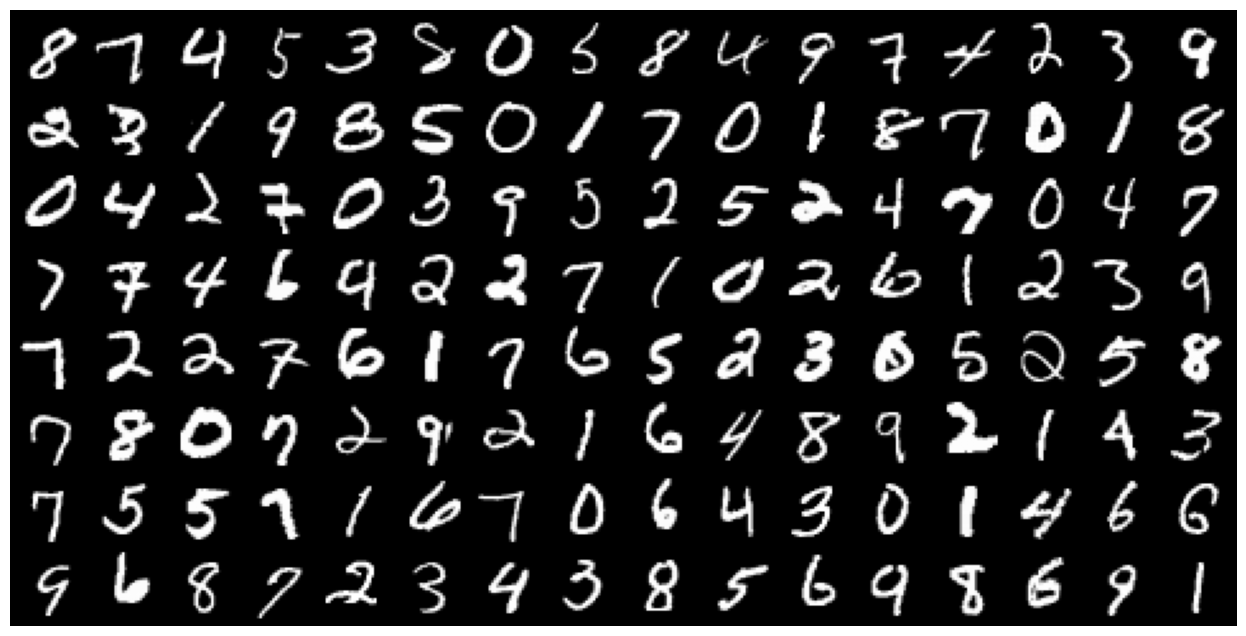

In [ ]:
from torchvision.utils import make_grid
for images,_ in train_loader:
  print('images.shape:', images.shape)
  plt.figure(figsize=(16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break

#Hidden layers, Activation Functions and Non-linearity

A NN with two layers will be created: A hidden layer and a output layer. There will be an activation function between the two layers.

In [ ]:
for images, labels in train_loader:
  print('images.shape:', images.shape)
  inputs = images.reshape(-1,28*28)
  print('inputs.shape:', inputs.shape)
  break

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Next, a nn.Linear object will be created, which will serve as the hidden layer. The size of its output will be 32 elements.

![](https://media.licdn.com/dms/image/v2/C5612AQEtIPalWZIrLQ/article-inline_image-shrink_1500_2232/article-inline_image-shrink_1500_2232/0/1629333609383?e=1762387200&v=beta&t=7y3raVWa2rBW44am-9xo9WKwJPKjf8Qsei9lDQXKZF4)

In [ ]:
input_size = inputs.shape[-1]
hidden_size = 32

In [ ]:
import torch.nn.functional as F
import torch.nn as nn
layer1 = nn.Linear(input_size, hidden_size)
layer1

Linear(in_features=784, out_features=32, bias=True)

In [ ]:
inputs.shape

torch.Size([128, 784])

In [ ]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


The above function is  explained by the Matrix operation below. Please note both torches are 128 x 32

In [ ]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias #Matrix operation
print('layer1_outputs_direct.shape:', layer1_outputs_direct.shape)

layer1_outputs_direct.shape: torch.Size([128, 32])


In [ ]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3) #This function compares both results with a tolerance of 1e-3

True

Next, the Rectified Linear Unit (ReLU) function will be used as the activation function for the outputs. This formula is relu(x) = max(0,x), it replaces the negative values in a given tensor with the value 0.

![](https://media.licdn.com/dms/image/v2/C5612AQHr87wQF3iWbw/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1629340615667?e=1762387200&v=beta&t=gwbUGryFGJ7CUJ3p2f9M6buWtWq-zXf8L3sbHREq14k)

https://www.linkedin.com/pulse/activation-functions-101-sigmoid-tanh-relu-softmax-ben-hammouda/



In [ ]:
F.relu(torch.tensor([[1,-1,0],[-0.1, .2, 3]])) #Example

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

In [ ]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())
#

min(layer1_outputs): -0.7076568603515625
min(relu_outputs): 0.0


Relu activation function will work only with those outputs that were positive and the relationship between the layer1 outputs and Relu outputs are no longer linear.

Now, an output layer will be created to convert the relu vector into  vectors of length 10 since we have 10 target labels

In [30]:
output_size =10
layer2 = nn.Linear(hidden_size, output_size)

In [31]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


Now we can compute loss function with `F.cross_entropy`to adjust the weights of `layer1` and `layer2` using gradient descent.

In [32]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3106, grad_fn=<NllLossBackward0>)

We can make the operation directly as follows:

In [42]:
outputs= (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias
torch.allclose(outputs, layer2_outputs, 2e-3)

#print('outputs.shape:', outputs.shape)

True

What if I were not used the ReLU activation function? Well, If I had not done that, there would not have made any sense to create different layers. The ReLU layers modifies the linear relationship between the layers.

In [56]:
# Imagine a fictional layer without activation function
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias
combined_layer= nn.Linear(input_size, output_size)
combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer2.weight @ layer1.bias + layer2.bias
outputs3 = inputs@combined_layer.weight.t() + combined_layer.bias
torch.allclose(outputs2, outputs3, 1e-3)

True